<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/Face_id3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/AI/Face_id3/train',
                                      target_size = (150,150),
                                       batch_size = 12,  #sohatgao1muong
                                       class_mode = 'categorical') #phan loai

validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/AI/Face_id3/validation',
                                      target_size = (150,150),
                                       batch_size = 12,  #sohatgao1muong
                                       class_mode = 'categorical') #phan loai        

Found 150 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'H.An': 0, 'Phat': 1, 'T.An': 2}

In [ ]:

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode="max",restore_best_weights=True)
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape =(150,150,3)),
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(3,activation='softmax')
                                    ])

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy']) #categorical_crossentropy

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:

history = model.fit(train_dataset,batch_size=12,epochs=20,verbose=1,validation_data=validation_dataset)


Epoch 1/20
13/13 [==============================] - 23s 2s/step - loss: 1.0970 - accuracy: 0.3333 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 2/20
13/13 [==============================] - 21s 2s/step - loss: 1.0939 - accuracy: 0.4267 - val_loss: 1.0949 - val_accuracy: 0.4333
Epoch 3/20
13/13 [==============================] - 21s 2s/step - loss: 1.0906 - accuracy: 0.4000 - val_loss: 1.0921 - val_accuracy: 0.3333
Epoch 4/20
13/13 [==============================] - 21s 2s/step - loss: 1.0867 - accuracy: 0.3733 - val_loss: 1.0887 - val_accuracy: 0.4333
Epoch 5/20
13/13 [==============================] - 21s 2s/step - loss: 1.0813 - accuracy: 0.4000 - val_loss: 1.0839 - val_accuracy: 0.4333
Epoch 6/20
13/13 [==============================] - 21s 2s/step - loss: 1.0752 - accuracy: 0.3600 - val_loss: 1.0763 - val_accuracy: 0.4333
Epoch 7/20
13/13 [==============================] - 21s 2s/step - loss: 1.0602 - accuracy: 0.5000 - val_loss: 1.0626 - val_accuracy: 0.4667
Epoch 8/20
13/13 [==

In [ ]:
model.save('/content/drive/MyDrive/AI/faceid3.h5')

In [ ]:
#danh gia val
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

3/3 [==============================] - 2s 670ms/step - loss: 0.0271 - accuracy: 1.0000
test loss =  0.027107009664177895
test accuracy =  1.0


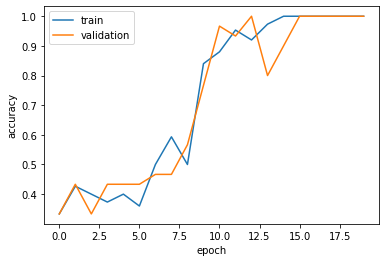

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

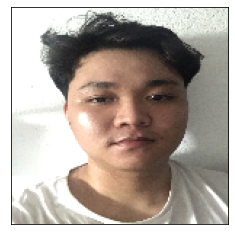

Thanh An


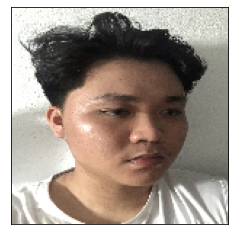

Thanh An


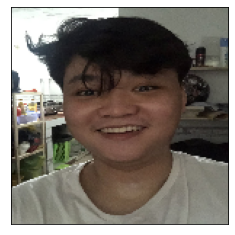

Thanh An


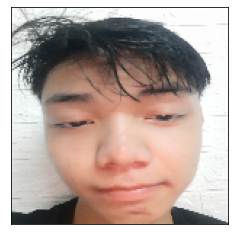

Phat


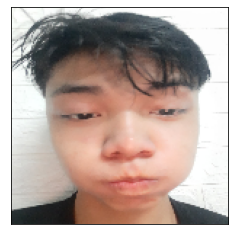

Phat


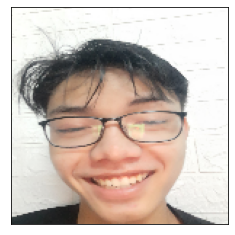

Phat


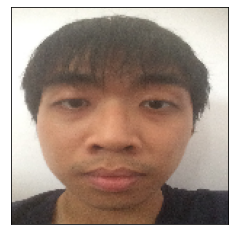

Hoang Ann


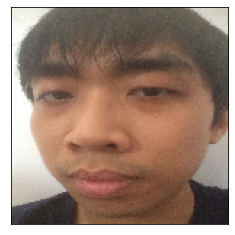

Hoang Ann


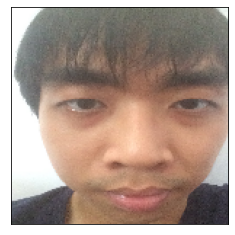

Hoang Ann


In [ ]:

dir = '/content/drive/MyDrive/AI/Face_id3/test'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  x= img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val=np.argmax(model.predict(images))
  if val == 0:
    print("Hoang Ann")
  if val == 1:
    print("Phat")
  if val == 2:
    print("Thanh An")
  #print(val)


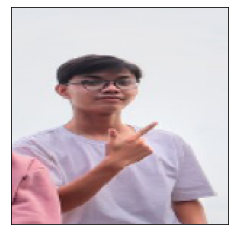

Phat


In [ ]:

img = load_img("/content/phat.jpg", target_size=(150,150))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()
x= img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val=np.argmax(model.predict(images))
if val == 0:
    print("Hoang Ann")
if val == 1:
    print("Phat")
if val == 2:
    print("Thanh An")